In [22]:
import numpy as np
import torch
from diffusers import (
    ControlNetModel,
    DPMSolverMultistepScheduler,
    EulerAncestralDiscreteScheduler,
    StableDiffusionControlNetPipeline,
)
from diffusers.utils import load_image
from PIL import Image

device = "cuda"


In [3]:
import json


def load_json(path):
    with open(path, "r", encoding="utf8") as f:
        return json.load(f)


In [5]:
controlnet = ControlNetModel.from_pretrained(
    R"D:\stable-diffusion\lib\controlnet\sketch-a-sketch",
    torch_dtype=torch.float16,
).to(device)

pipe = StableDiffusionControlNetPipeline.from_single_file(
    R"D:\stable-diffusion\lib\models\furnace50_furnace50-fixed_vae-2181-2982-0004.safetensors",
    use_safetensors=True,
    controlnet=controlnet,
    torch_dtype=torch.float16,
).to(device)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
d:\Programming\auto-sketch\venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [33]:
pipe.safety_checker = None
pipe.scheduler = DPMSolverMultistepScheduler.from_config(
    pipe.scheduler.config, use_karras_sigmas=True
)


In [28]:
from PIL import Image

# curr_sketch_image = Image.new("RGB", (512, 512), (255, 255, 255))
curr_sketch_image = Image.open(R"D:\Programming\auto-sketch\Untitled.png")


In [14]:
pipe.load_textual_inversion(R"D:\stable-diffusion\lib\ti\bad-image-v2 negative embedding\bad-image-v2-39000.pt")
pipe.load_textual_inversion(R"D:\stable-diffusion\lib\ti\bad-hands-5\bad-hands-5.pt")
pipe.load_textual_inversion(R"D:\stable-diffusion\lib\ti\bad-artist negative embedding\bad-artist.pt")
pipe.load_textual_inversion(R"D:\stable-diffusion\lib\ti\EasyNegative\EasyNegative.pt")

ValueError: Token emb_params already in tokenizer vocabulary. Please choose a different token name or remove emb_params and embedding from the tokenizer and text encoder.

100%|██████████| 20/20 [00:01<00:00, 11.15it/s]


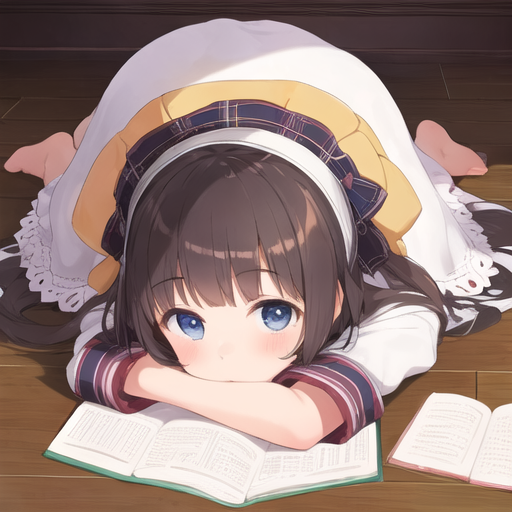

In [35]:
prompt = "masterpiece, best quality, 1girl, solo,"
negative_prompt = "<EasyNegative>, <bad-artist>, <bad-hands-5>, <bad-image-v2-39000>,\nlowres, ((bad anatomy)), ((bad hands)), text, missing finger, extra digits, fewer digits, blurry, ((mutated hands and fingers)), (poorly drawn face), ((mutation)), ((deformed face)), (ugly), ((bad proportions)), ((extra limbs)), extra face, (double head), (extra head), ((extra feet)), monster, logo, cropped, worst quality, low quality, normal quality, jpeg, humpbacked, long body, long neck, ((jpeg artifacts)), "

res = pipe(
    prompt,
    curr_sketch_image.convert("RGB").point(lambda p: 256 if p > 128 else 0),
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    controlnet_conditioning_scale=1.0,
)
res.images[0]


In [37]:
hash(123)

123